# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Actividad 01: Herramientas Computacionales para Ciencia de Datos </center></h1>
    
## 1. Objetivos de la Actividad

Esta Actividad tiene como objetivo probar el ambiente de programación de cada estudiante, la instalación de librerías de Python. El segundo objetivo es aprender a usar GitHub, a configurar su repositorio, y entregar la actividad.

## 2. Módulos de Python

### 2.1 Importar módulos

Se recomienda comenzar con la importación de módulos o librerías de funciones para distintos usos, o partes de una libreria
Para facilitar la referencia a librerías en el resto del código, se acostumbra asignarles un alias. La sintaxis general a usar para importar un módulo es:

``import NOMBRE_MODULO as ALIAS_MODULO``
o
``from NOMBRE_MODULO import FUNCION``

In [2]:
#Importación de librerías: importe las siguientes librerías, usando alias comunes: numpy, pandas, geopandas
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## 3. Ejercicio: Inspección de Datos del Censo 2017
El código a continuación permite descargar, leer, hacer algunos cálculos básicos y visualizar los datos de población del censo chileno de 2017 para la región metropolitana.
En este notebook, ud. sólo debe ejecutar las celdas de código a continuación, hasta generar una figura con la distribución de población total por manzana censal en la RM. Como demostración de la ejecución exitosa del código, debe subir este notebook y la figura final a su repositorio de Github.

In [3]:
#Leer archivo enun DataFrame
dat=pd.read_csv('Censo2017_Manzanas.csv',delimiter=';')

#Visualizar las primeras lineas
dat.head()

REGION  PROVINCIA  COMUNA  DC  AREA  ZC_LOC  MZ_ENT  ID_ZONA_LOC  \
0       1         11    1101   1     1       1       1         7849   
1       1         11    1101   1     1       1      10         7849   
2       1         11    1101   1     1       1      11         7849   
3       1         11    1101   1     1       1      12         7849   
4       1         11    1101   1     1       1      13         7849   

      ID_MANZENT  PERSONAS  ... MATREC MATIRREC P05_1 P05_2 P05_3 P05_4  \
0  1101011001001        15  ...      0        0     0     0     0     0   
1  1101011001010        70  ...      1        0    15     0     0     0   
2  1101011001011        36  ...      5        0    15     0     0     0   
3  1101011001012        65  ...      9        4    24     0     0     0   
4  1101011001013        39  ...      0        0     9     0     0     0   

  REGION_15R PROVINCIA_15R  COMUNA_15R  ID_MANZENT_15R  
0          1            11        1101   1101011001001  
1          1            11        1101   1101011001010  
2          1            11        1101   1101011001011  
3          1            11        1101   1101011001012  
4          1            11        1101   1101011001013  

[5 rows x 59 columns]

In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180499 entries, 0 to 180498
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   REGION          180499 non-null  int64 
 1   PROVINCIA       180499 non-null  int64 
 2   COMUNA          180499 non-null  int64 
 3   DC              180499 non-null  int64 
 4   AREA            180499 non-null  int64 
 5   ZC_LOC          180499 non-null  int64 
 6   MZ_ENT          180499 non-null  int64 
 7   ID_ZONA_LOC     180499 non-null  int64 
 8   ID_MANZENT      180499 non-null  int64 
 9   PERSONAS        180499 non-null  int64 
 10  HOMBRES         180499 non-null  object
 11  MUJERES         180499 non-null  object
 12  EDAD_0A5        180499 non-null  object
 13  EDAD_6A14       180499 non-null  object
 14  EDAD_15A64      180499 non-null  object
 15  EDAD_65YMAS     180499 non-null  object
 16  INMIGRANTES     180499 non-null  object
 17  PUEBLO          180499 non-nu

### Pregunta: ¿Cuál era la población total de Chile en 2017?

Para responderla podemos hacer un cálculo sencillo y sumar todos los datos de la columna `PERSONAS`:

In [5]:
#Total de población
total_pop=dat['PERSONAS'].sum()
print(f'Población total en 2017: {total_pop}')

Población total en 2017: 17574003


También podemos usar algunas funciones más avanzadas de `pandas`para analizar la distribución de personas por región y edad:

In [6]:
#Distribución por edad y género
cols=['EDAD_0A5','EDAD_6A14','EDAD_15A64','EDAD_65YMAS']
for col in cols:
    dat[col]=dat[col].replace('*',0).astype(float)
    
pv=pd.pivot_table(dat, index='REGION', values=cols, aggfunc='sum', margins=False)
pv

EDAD_0A5  EDAD_15A64  EDAD_65YMAS  EDAD_6A14
REGION                                              
1        27089.0    225991.0      22784.0    42860.0
2        40763.0    427746.0      40299.0    70497.0
3        18862.0    188979.0      23711.0    33304.0
4        49130.0    498186.0      77212.0    83390.0
5       110371.0   1212273.0     222900.0   176235.0
6        58426.0    609723.0      96677.0   100364.0
7        62106.0    695161.0     111206.0   108436.0
8        98184.0   1049723.0     164977.0   166678.0
9        57165.0    629746.0     103612.0    99561.0
10       47403.0    555544.0      78907.0    90394.0
11        5684.0     67980.0       7017.0    12061.0
12        8029.0    112754.0      16636.0    15331.0
13      498778.0   4953736.0     731246.0   759246.0
14       21771.0    255977.0      41598.0    39097.0
15       16207.0    151468.0      22560.0    26333.0
16       26815.0    317668.0      56137.0    48137.0

Y podemos graficar la cantidad por región:

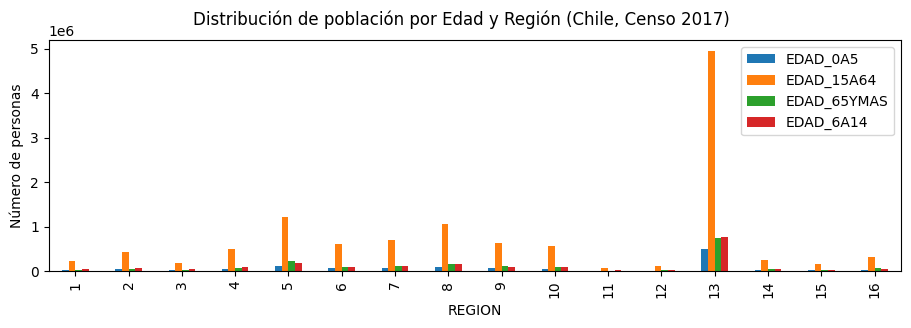

In [7]:
fig = plt.figure(figsize=(11,3))
ax = fig.add_subplot(111)
ax.set_ylabel('Número de personas')
fig.suptitle('Distribución de población por Edad y Región (Chile, Censo 2017)')
pv.plot(kind='bar', ax =ax);

## 4. Creación de un Mapa con información del Censo

A continuación usaremos librerías de geopandas para conectar un mapa de la Región Metropolitana con datos del Censo de 2017.

In [8]:
#Leer datos censales
manz=gpd.read_file('R13/MANZANA_IND_C17.shp')
com=gpd.read_file('R13/COMUNA_C17.shp')

Geopandas permite graficar archivos de mapas de múltiples formas. Para más información pueden revisar el siguiente enlace: https://geopandas.org/en/stable/docs/user_guide/mapping.html

<Axes: >

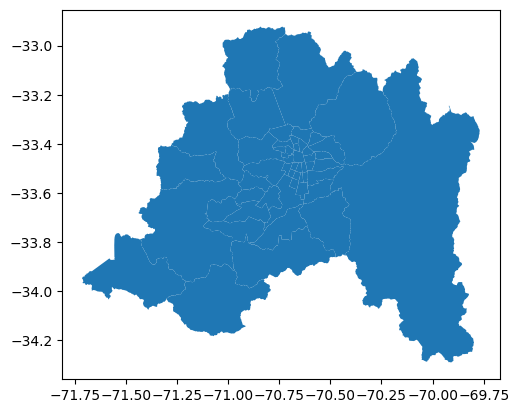

In [9]:
com.plot()

In [10]:
manz.head()

REGION                        NOM_REGION PROVINCIA NOM_PROVIN COMUNA  \
0     13  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  13101   
1     13  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  13101   
2     13  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  13101   
3     13  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  13101   
4     13  REGIÓN METROPOLITANA DE SANTIAGO       131   SANTIAGO  13101   

  NOM_COMUNA  DISTRITO  LOC_ZON  ENT_MAN  CATEGORIA NOM_CATEGO  \
0   SANTIAGO         7        1        2          1         CD   
1   SANTIAGO         8        1        2          1         CD   
2   SANTIAGO         7        1        3          1         CD   
3   SANTIAGO         7        1        4          1         CD   
4   SANTIAGO         7        1        8          1         CD   

        MANZENT_I  TOTAL_PERS  TOTAL_VIVI  SHAPE_Leng    SHAPE_Area  \
0  13101071001002         764         287    0.005560  1.354544e-06   
1  13101081001002        1307         509    0.006557  2.630421e-06   
2  13101071001003          64          17    0.003859  5.979189e-07   
3  13101071001004          52          21    0.004683  1.265246e-06   
4  13101071001008          67          14    0.003491  7.452444e-07   

                                            geometry  
0  POLYGON ((-70.67695 -33.42691, -70.67685 -33.4...  
1  POLYGON ((-70.67362 -33.42898, -70.67517 -33.4...  
2  POLYGON ((-70.67812 -33.42803, -70.67813 -33.4...  
3  POLYGON ((-70.68043 -33.42897, -70.68046 -33.4...  
4  POLYGON ((-70.67805 -33.42921, -70.67858 -33.4...

El siguiente código conecta el mapa de la Región Metropolitana con la población por manzana del Censo 2017. Edite el código para que la figura tenga su nombre en el Titulo

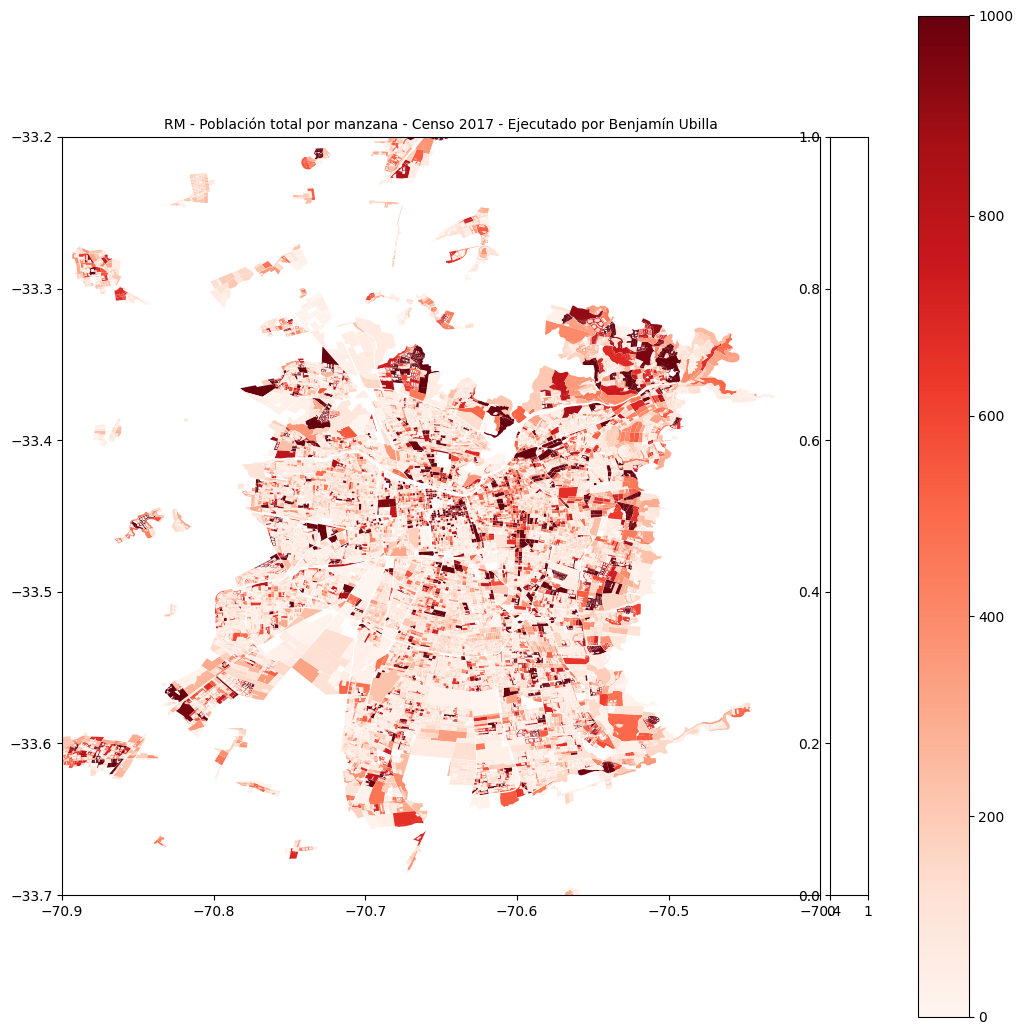

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors

#Crear figura y ejes
fig=plt.figure(figsize=(13,13))
ax=fig.add_subplot(111)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# cantidad de personas por manzana
Z=manz['TOTAL_PERS']
manz.plot(ax=ax, column='TOTAL_PERS', cmap='Reds', legend=True, vmin=0, vmax=1000)

com_projected = com.to_crs(epsg=3857)
com_projected.boundary.plot(ax=ax, lw=0.2, color='k')

xlim=[-70.9,-70.4]
ylim=[-33.7,-33.2]
for x, y, label in zip(com_projected.geometry.centroid.x, com_projected.geometry.centroid.y, com_projected.NOM_COMUNA):
    if xlim[0]<x<xlim[1] and ylim[0]<y<ylim[1]:
        ax.text(x, y, label, fontsize = 10)
        
ax.set_xlim(xlim)
ax.set_ylim(ylim);

## Reemplace 'XXX' por su apellido
ax.set_title('RM - Población total por manzana - Censo 2017 - Ejecutado por Benjamín Ubilla',fontsize=10)

## Reemplace 'XXX' por su apellido en el nombre del archivo de salida 
fig.savefig('PoblacionRM_C2017_Benjamín_Ubilla.jpg')

## 5. Cierre de la Actividad 01: Repositorio presonal

Para terminar la Actividad 01, deben hacer los siguientes pasos:
- Crear un repositorio en su cuenta personal con el nombre ``IMT2200-<NOMBRE>-<APELLIDO>`` y clonar en su computador.
- Crear una carpeta adentro llamada "Actividad 01" y copiar adentro el contenido de la carpeta "Actividad 01" del repositorio del curso.
- Actualizar el repositorio agregando el Notebook de Jupyter y la imagen con el Mapa con su nombre.
- Editar el archivo ``README.md`` para describir su repositorio.
- Entregar en el módulo ``Actividad 1`` en Canvas la URL de su repositorio para corrección.

## 6. Contenido novedoso
Según el ítem 2 de la evaluación, se requiere que agregue contenido novedoso al notebook. Aprovecharé mis dotes de modelado 3D en Blender para renderizar una imagen 3D de un dataset random y lo agregaré al notebook.

**Requisitos previos:**
- Correr `pip install bpy` y `pip install blender-plots` en la terminal de Python.
- Tener **Python 3.11 exacto**.
- Tener instalado $\text{\LaTeX}$.

La documentación de `blender-plots` se encuentra en [https://github.com/Linusnie/blender-plots](https://github.com/Linusnie/blender-plots).

In [1]:
import bpy
from mathutils import Vector
import subprocess
import uuid
import numpy as np
import pathlib

latex_folder = pathlib.Path("E:\\latex_files")
latex_folder.mkdir(exist_ok=True)

tex_template = r"""
\documentclass[preview]{standalone}
\usepackage[spanish,es-nodecimaldot]{babel}
\usepackage{amsmath}
\usepackage{amssymb}
\usepackage{mlmodern}
\usepackage{xcolor}
\usepackage[dvisvgm]{graphicx}

\begin{document}
%s
\end{document}
"""

def latex_to_svg(tex_string: str, tex_template: str = tex_template) -> pathlib.Path:
    tex_file = latex_folder / f"{uuid.uuid4()}.tex"
    tex_file.write_text(tex_template % tex_string, encoding='utf-8')
    svg_file = latex_folder / f"{tex_file.stem}.svg"
    for _ in range(2):
        subprocess.run(["latex", "-interaction=nonstopmode", "-shell-escape", str(tex_file)], cwd=latex_folder, check=True)
    subprocess.run(["dvisvgm", "--no-fonts", str(tex_file.with_suffix('.dvi'))], cwd=latex_folder, check=True)
    return svg_file

def create_latex_text_object(
    tex_string: str,
    name: str = "LatexText",
    scale: float = 500.0,
    tex_template: str = tex_template,
    filename_pattern: str | None = None
) -> None:
    svg_file = latex_to_svg(tex_string, tex_template=tex_template)
    # Current objects in the scene
    old_objects = set(bpy.context.view_layer.objects)
    # Import the SVG file
    bpy.ops.import_curve.svg(filepath=str(svg_file) if filename_pattern is None else filename_pattern % svg_file.stem)
    # New objects in the scene
    new_objects = set(bpy.context.view_layer.objects)
    svg_objects = list(new_objects - old_objects)
    if svg_objects:
        # Calcular el centro del bounding box de todos los objetos
        min_corner = Vector((float('inf'), float('inf'), float('inf')))
        max_corner = Vector((float('-inf'), float('-inf'), float('-inf')))
        
        for obj in svg_objects:
            for v in obj.bound_box:
                world_coord = obj.matrix_world @ Vector(v)
                min_corner = Vector(map(min, min_corner, world_coord))
                max_corner = Vector(map(max, max_corner, world_coord))

        for obj in svg_objects:
            obj.name = name
            obj.select_set(True)
            bpy.context.view_layer.objects.active = obj
            bpy.ops.object.convert(target='MESH')
            obj.scale = (scale, scale, scale)
            obj.location += -scale * (min_corner + max_corner) / 2
            bpy.ops.object.transform_apply(location=True, scale=True)
            bpy.ops.object.origin_set(type='ORIGIN_GEOMETRY')
            bpy.ops.object.select_all(action='DESELECT')
    
    return svg_objects

In [2]:
import math
from typing import Callable


def get_center(objects: list[bpy.types.Object]) -> Vector:
    """Calculate the center of the bounding box of a list of objects."""
    min_corner = Vector((float('inf'), float('inf'), float('inf')))
    max_corner = Vector((float('-inf'), float('-inf'), float('-inf')))
    
    for obj in objects:
        for v in obj.bound_box:
            world_coord = obj.matrix_world @ Vector(v)
            min_corner = Vector(map(min, min_corner, world_coord))
            max_corner = Vector(map(max, max_corner, world_coord))
    
    return (min_corner + max_corner) / 2


def rotate_objects(objects: list[bpy.types.Object], rotation: tuple[float, float, float]) -> None:
    if objects:
        center = get_center(objects)
        # Rotates a list of objects about the object's center by the given Euler angles (in radians).
        old_objects = set(bpy.context.view_layer.objects)
        bpy.ops.object.empty_add(type='PLAIN_AXES', location=center)
        empty = next(iter(set(bpy.context.view_layer.objects) - old_objects), None)
        if empty is None:
            raise RuntimeError("Failed to create empty object for rotation.")
        empty.name = "Rotation_Empty"
        for obj in objects:
            obj.select_set(True)
        bpy.context.view_layer.objects.active = empty
        bpy.ops.object.parent_set(type='OBJECT', keep_transform=True)
        empty.rotation_euler = rotation
        # Unparent the objects to apply the rotation
        bpy.ops.object.parent_clear(type='CLEAR_KEEP_TRANSFORM')
        bpy.ops.object.select_all(action='DESELECT')
        # Delete the empty object
        bpy.data.objects.remove(empty, do_unlink=True)


def magnitude(value: float | np.ndarray) -> float | np.ndarray:
    if isinstance(value, (float, int)):
        return abs(value)
    return np.linalg.norm(value)


def inverse_lerp(value: float | np.ndarray, start: float | np.ndarray, end: float | np.ndarray) -> float | np.ndarray:
    """Calculate the inverse linear interpolation of a value between start and end."""
    if magnitude(start - end) == 0:
        return 0.0
    return (value - start) / (end - start)


def lerp(value: float | np.ndarray, start: float | np.ndarray, end: float | np.ndarray) -> float | np.ndarray:
    """Calculate the linear interpolation of a value between start and end."""
    return start + (end - start) * value


def get_bounding_box_x_length(objects: list[bpy.types.Object]) -> float:
    """Calculate the total length of the bounding box in the X direction."""
    min_x = float('inf')
    max_x = float('-inf')
    for obj in objects:
        for v in obj.bound_box:
            world_coord = obj.matrix_world @ Vector(v)
            min_x = min(min_x, world_coord.x)
            max_x = max(max_x, world_coord.x)
    return max_x - min_x


def get_bounding_box_y_length(objects: list[bpy.types.Object]) -> float:
    """Calculate the total length of the bounding box in the Y direction."""
    min_y = float('inf')
    max_y = float('-inf')
    for obj in objects:
        for v in obj.bound_box:
            world_coord = obj.matrix_world @ Vector(v)
            min_y = min(min_y, world_coord.y)
            max_y = max(max_y, world_coord.y)
    return max_y - min_y


def get_bounding_box_z_length(objects: list[bpy.types.Object]) -> float:
    """Calculate the total length of the bounding box in the Z direction."""
    min_z = float('inf')
    max_z = float('-inf')
    for obj in objects:
        for v in obj.bound_box:
            world_coord = obj.matrix_world @ Vector(v)
            min_z = min(min_z, world_coord.z)
            max_z = max(max_z, world_coord.z)
    return max_z - min_z


def set_color(obj: bpy.types.Object, color: tuple[float, float, float]) -> None:
    """Set the color of a Blender object."""
    mat = bpy.data.materials.new(name=f"{obj.name}_Material")
    mat.diffuse_color = (*color, 1.0)  # RGBA
    if obj.data.materials:
        obj.data.materials[0] = mat
    else:
        obj.data.materials.append(mat)


def create_axes(
    name: str = "Axes",
    color: tuple[float, float, float] = (0.0, 0.0, 0.0),
    cylinder_radius_scale: float = 1.0,
    axis_label_scale: float = 500.0,
    coord_label_scale: float = 300.0,
    label_offset: float = 0.2,
    x_label: str = "$$x$$",
    y_label: str = "$$y$$",
    z_label: str = "$$z$$",
    x_range: tuple[float, float] = (-3.0, 3.0),
    y_range: tuple[float, float] = (-3.0, 3.0),
    z_range: tuple[float, float] = (-3.0, 3.0),
    x_axis_length: float = 6.0,
    y_axis_length: float = 6.0,
    z_axis_length: float = 6.0,
    x_coord_to_label: dict[float, str] | None = None,
    y_coord_to_label: dict[float, str] | None = None,
    z_coord_to_label: dict[float, str] | None = None,
    x_tick_length: float = 0.2,
    y_tick_length: float = 0.2,
    z_tick_length: float = 0.2,
    x_tick_label_offset: float = 0.1,
    y_tick_label_offset: float = 0.1,
    z_tick_label_offset: float = 0.1
) -> tuple[list[bpy.types.Object], dict[str, Callable], dict[str, Callable]]:
    # Unselect all objects
    bpy.ops.object.select_all(action='DESELECT')
    # Set active object to None
    bpy.context.view_layer.objects.active = None

    def axes_coords_to_blender_coords(x: float | np.ndarray, y: float | np.ndarray, z: float | np.ndarray) -> np.ndarray:
        """Convert axes coordinates to Blender coordinates."""
        x = lerp(inverse_lerp(x, x_range[0], x_range[1]), -x_axis_length / 2, x_axis_length / 2)
        y = lerp(inverse_lerp(y, y_range[0], y_range[1]), -y_axis_length / 2, y_axis_length / 2)
        z = lerp(inverse_lerp(z, z_range[0], z_range[1]), -z_axis_length / 2, z_axis_length / 2)
        return np.array([x, y, z])

    def blender_coords_to_axes_coords(x: float | np.ndarray, y: float | np.ndarray, z: float | np.ndarray) -> np.ndarray:
        """Convert Blender coordinates to axes coordinates."""
        x = lerp(inverse_lerp(x, -x_axis_length / 2, x_axis_length / 2), x_range[0], x_range[1])
        y = lerp(inverse_lerp(y, -y_axis_length / 2, y_axis_length / 2), y_range[0], y_range[1])
        z = lerp(inverse_lerp(z, -z_axis_length / 2, z_axis_length / 2), z_range[0], z_range[1])
        return np.array([x, y, z])

    objects = []
    bpy.ops.mesh.primitive_cylinder_add(
        radius=0.05 * cylinder_radius_scale, depth=x_axis_length, location=(0, 0, 0)
    )
    x_axis = bpy.context.object
    if x_axis is None:
        raise RuntimeError("Failed to create X axis.")
    rotate_objects([x_axis], (math.pi / 2, 0, math.pi / 2))
    x_axis.name = f"{name}_X"
    set_color(x_axis, color)

    bpy.ops.mesh.primitive_cylinder_add(
        radius=0.05 * cylinder_radius_scale, depth=y_axis_length, location=(0, 0, 0)
    )
    y_axis = bpy.context.object
    if y_axis is None:
        raise RuntimeError("Failed to create Y axis.")
    rotate_objects([y_axis], (math.pi / 2, 0, 0))
    y_axis.name = f"{name}_Y"
    set_color(y_axis, color)

    bpy.ops.mesh.primitive_cylinder_add(
        radius=0.05 * cylinder_radius_scale, depth=z_axis_length, location=(0, 0, 0)
    )
    z_axis = bpy.context.object
    z_axis.name = f"{name}_Z"
    set_color(z_axis, color)

    objects.extend([x_axis, y_axis, z_axis])

    # Create labels
    x_label_objects = create_latex_text_object(x_label, name=f"{name}_X_Label", scale=axis_label_scale)
    y_label_objects = create_latex_text_object(y_label, name=f"{name}_Y_Label", scale=axis_label_scale)
    z_label_objects = create_latex_text_object(z_label, name=f"{name}_Z_Label", scale=axis_label_scale)
    
    objects.extend(x_label_objects + y_label_objects + z_label_objects)
    
    x_coord_to_label = x_coord_to_label or {}
    y_coord_to_label = y_coord_to_label or {}
    z_coord_to_label = z_coord_to_label or {}

    label_objects = []
    tick_objects = []

    for coord, label in x_coord_to_label.items():
        if x_range[0] <= coord <= x_range[1]:
            label_object = create_latex_text_object(label, name=f"{name}_X_{coord}", scale=coord_label_scale)
            bounding_box_y = get_bounding_box_y_length(label_object)
            for obj in label_object:
                obj.location += Vector(tuple(axes_coords_to_blender_coords(coord, 0, 0))) + Vector((0, -0.5 * bounding_box_y - 0.5 * x_tick_length - x_tick_label_offset, 0))
            label_objects.extend(label_object)
            bpy.ops.mesh.primitive_cylinder_add(
                radius=0.02 * cylinder_radius_scale, depth=x_tick_length, 
                location=(lerp(inverse_lerp(coord, *x_range), -x_axis_length / 2, x_axis_length / 2), lerp(inverse_lerp(0, *y_range), -y_axis_length / 2, y_axis_length / 2), lerp(inverse_lerp(0, *z_range), -z_axis_length / 2, z_axis_length / 2))
            )
            tick = bpy.context.object
            tick.name = f"{name}_X_Tick_{coord}"
            rotate_objects([tick], (math.pi / 2, 0, 0))
            tick_objects.append(tick)
            set_color(tick, color)
    for coord, label in y_coord_to_label.items():
        if y_range[0] <= coord <= y_range[1]:
            label_object = create_latex_text_object(label, name=f"{name}_Y_{coord}", scale=coord_label_scale)
            bounding_box_x = get_bounding_box_x_length(label_object)
            for obj in label_object:
                obj.location += Vector(tuple(axes_coords_to_blender_coords(0, coord, 0))) + Vector((-0.5 * bounding_box_x - 0.5 * y_tick_length - y_tick_label_offset, 0, 0))
            label_objects.extend(label_object)
            bpy.ops.mesh.primitive_cylinder_add(
                radius=0.02 * cylinder_radius_scale, depth=y_tick_length, 
                location=Vector((lerp(inverse_lerp(0, *x_range), -x_axis_length / 2, x_axis_length / 2), lerp(inverse_lerp(coord, *y_range), -y_axis_length / 2, y_axis_length / 2), lerp(inverse_lerp(0, *z_range), -z_axis_length / 2, z_axis_length / 2)))
            )
            tick = bpy.context.object
            tick.name = f"{name}_Y_Tick_{coord}"
            rotate_objects([tick], (math.pi / 2, 0, math.pi / 2))
            tick_objects.append(tick)
            set_color(tick, color)
    for coord, label in z_coord_to_label.items():
        if z_range[0] <= coord <= z_range[1]:
            label_object = create_latex_text_object(label, name=f"{name}_Z_{coord}", scale=coord_label_scale)
            rotate_objects(label_object, (math.pi / 2, 0, 0))
            bounding_box_x = get_bounding_box_x_length(label_object)
            for obj in label_object:
                obj.location += Vector(tuple(axes_coords_to_blender_coords(0, 0, coord))) + Vector((-0.5 * bounding_box_x - 0.5 * z_tick_length - z_tick_label_offset, 0, 0))
            label_objects.extend(label_object)
            bpy.ops.mesh.primitive_cylinder_add(
                radius=0.02 * cylinder_radius_scale, depth=z_tick_length, 
                location=Vector((lerp(inverse_lerp(0, *x_range), -x_axis_length / 2, x_axis_length / 2), lerp(inverse_lerp(0, *y_range), -y_axis_length / 2, y_axis_length / 2), lerp(inverse_lerp(coord, *z_range), -z_axis_length / 2, z_axis_length / 2)))
            )
            tick = bpy.context.object
            tick.name = f"{name}_Z_Tick_{coord}"
            rotate_objects([tick], (math.pi / 2, 0, math.pi / 2))
            tick_objects.append(tick)
            set_color(tick, color)

    objects.extend(label_objects + tick_objects)

    # Move axes to match the origin
    origin = axes_coords_to_blender_coords(
        min(max(0.0, x_range[0]), x_range[1]),
        min(max(0.0, y_range[0]), y_range[1]),
        min(max(0.0, z_range[0]), z_range[1])
    )
    x_axis.location += Vector((0, origin[1], origin[2]))
    y_axis.location += Vector((origin[0], 0, origin[2]))
    z_axis.location += Vector((origin[0], origin[1], 0))

    bounding_box_x_length = get_bounding_box_x_length(x_label_objects)
    bounding_box_y_length = get_bounding_box_y_length(y_label_objects)
    rotate_objects(z_label_objects, (math.pi / 2, 0, 0))
    bounding_box_z_length = get_bounding_box_z_length(z_label_objects)

    for obj in x_label_objects:
        obj.location += Vector((0, origin[1], origin[2])) + Vector((x_axis_length / 2, 0, 0)) + Vector((bounding_box_x_length / 2 + label_offset, 0, 0))
    for obj in y_label_objects:
        obj.location += Vector((origin[0], 0, origin[2])) + Vector((0, y_axis_length / 2, 0)) + Vector((0, bounding_box_y_length / 2 + label_offset, 0))
    for obj in z_label_objects:
        obj.location += Vector((origin[0], origin[1], 0)) + Vector((0, 0, z_axis_length / 2)) + Vector((0, 0, bounding_box_z_length / 2 + label_offset))

    return objects, axes_coords_to_blender_coords, blender_coords_to_axes_coords

In [3]:
def setup_scene() -> None:
    # Clear existing objects
    bpy.ops.object.select_all(action='SELECT')
    bpy.ops.object.delete(use_global=False)

    # Add camera and point light
    bpy.ops.object.camera_add(location=(5, -5, 5), rotation=(math.radians(60), 0, math.radians(45)))
    # Set main camera
    bpy.context.scene.camera = bpy.context.object
    bpy.ops.object.light_add(type='POINT', location=(5, -5, 5))
    cycles_prefs = bpy.context.preferences.addons['cycles'].preferences

    try:
        cycles_prefs.compute_device_type = 'CUDA'
    except TypeError:
        pass

    for device in cycles_prefs.devices:
        if device.type == 'GPU':
            device.use = True

In [4]:
from IPython.display import Image, display

def render_still(image_path: str, resolution_x: int = 1920, resolution_y: int = 1080) -> None:
    # Rendering settings
    bpy.context.scene.render.engine = 'BLENDER_EEVEE_NEXT'
    scene = bpy.context.scene
    scene.render.image_settings.file_format = 'PNG'
    scene.render.filepath = image_path
    scene.render.resolution_x = resolution_x
    scene.render.resolution_y = resolution_y
    # Background color
    world = bpy.data.worlds["World"]
    world.use_nodes = True
    background_node = world.node_tree.nodes["Background"]
    background_node.inputs[0].default_value = (1.0, 1.0, 1.0, 1.0)  # White background

    # Render the scene
    bpy.ops.render.render(write_still=True)
    display(Image(filename=image_path))

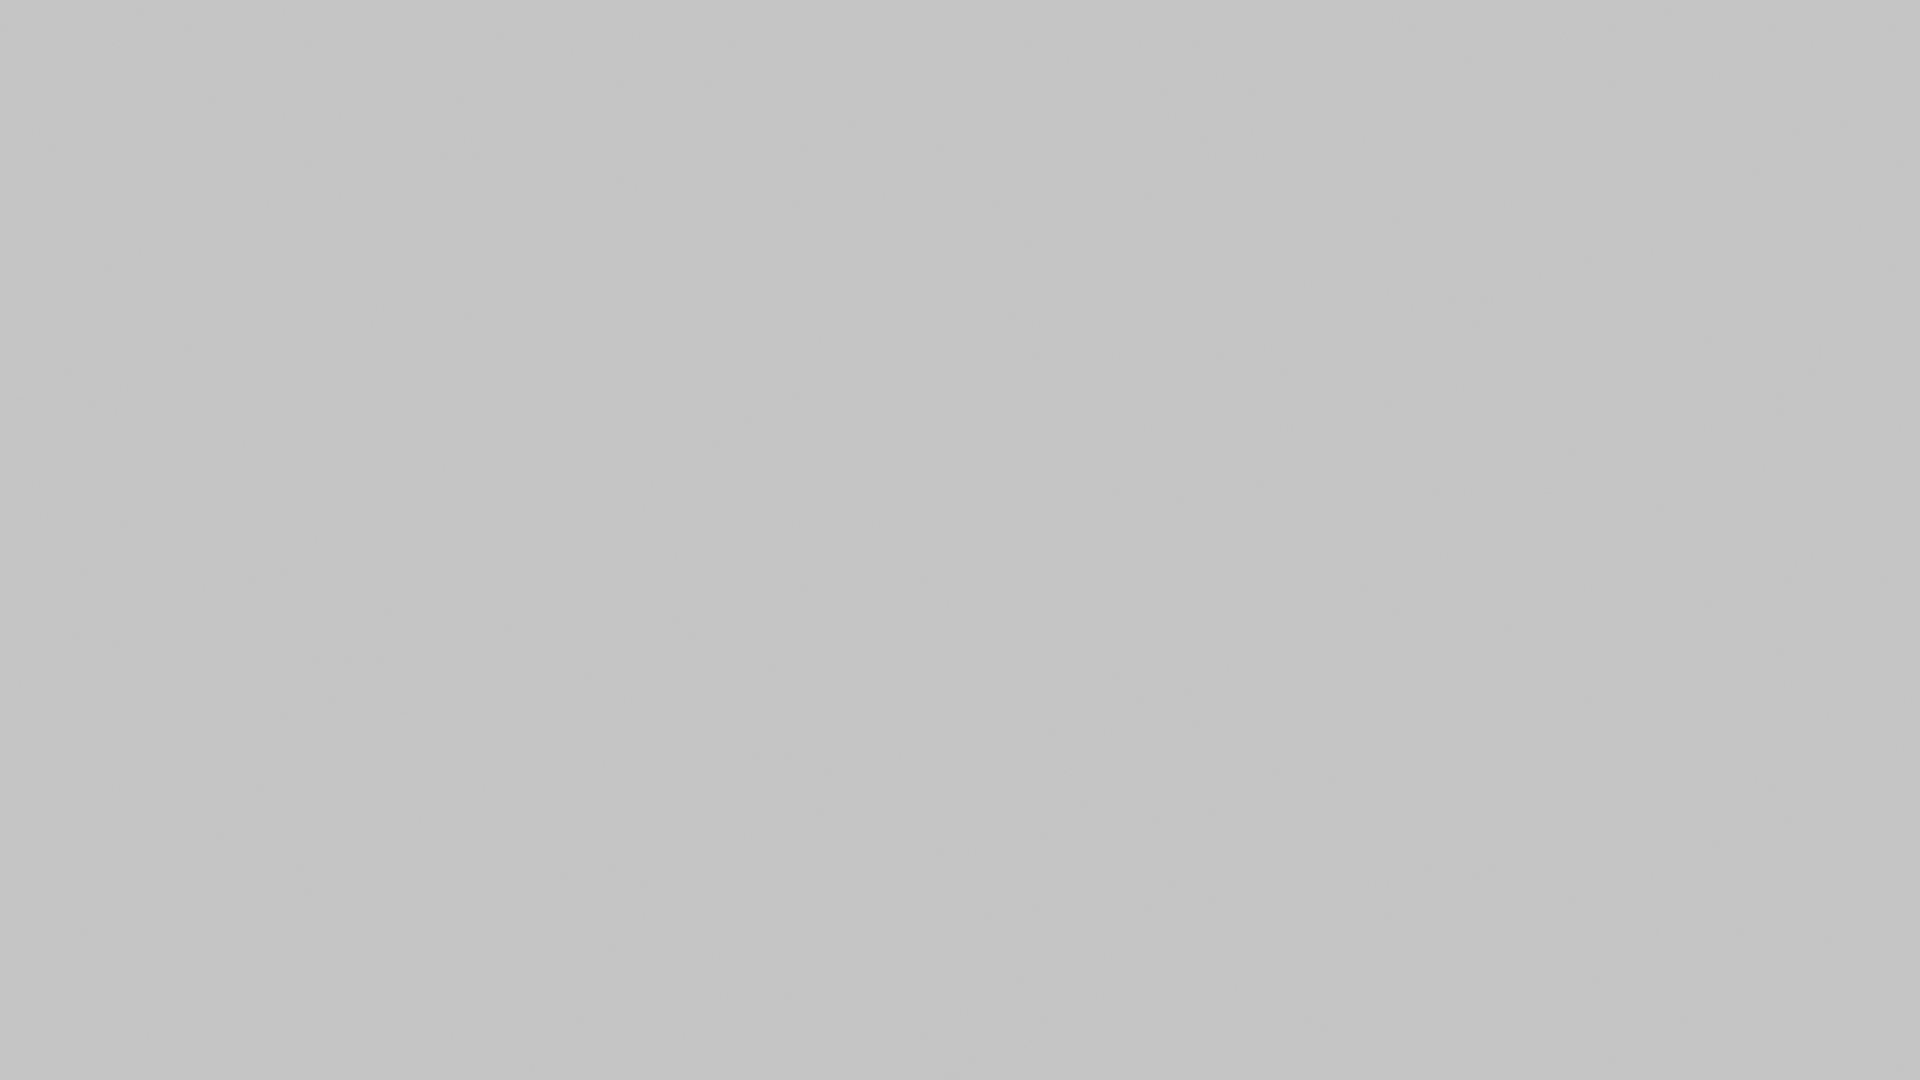

In [6]:
setup_scene()
render_still(str((pathlib.Path.cwd() / "initial_test_render.png").absolute()))

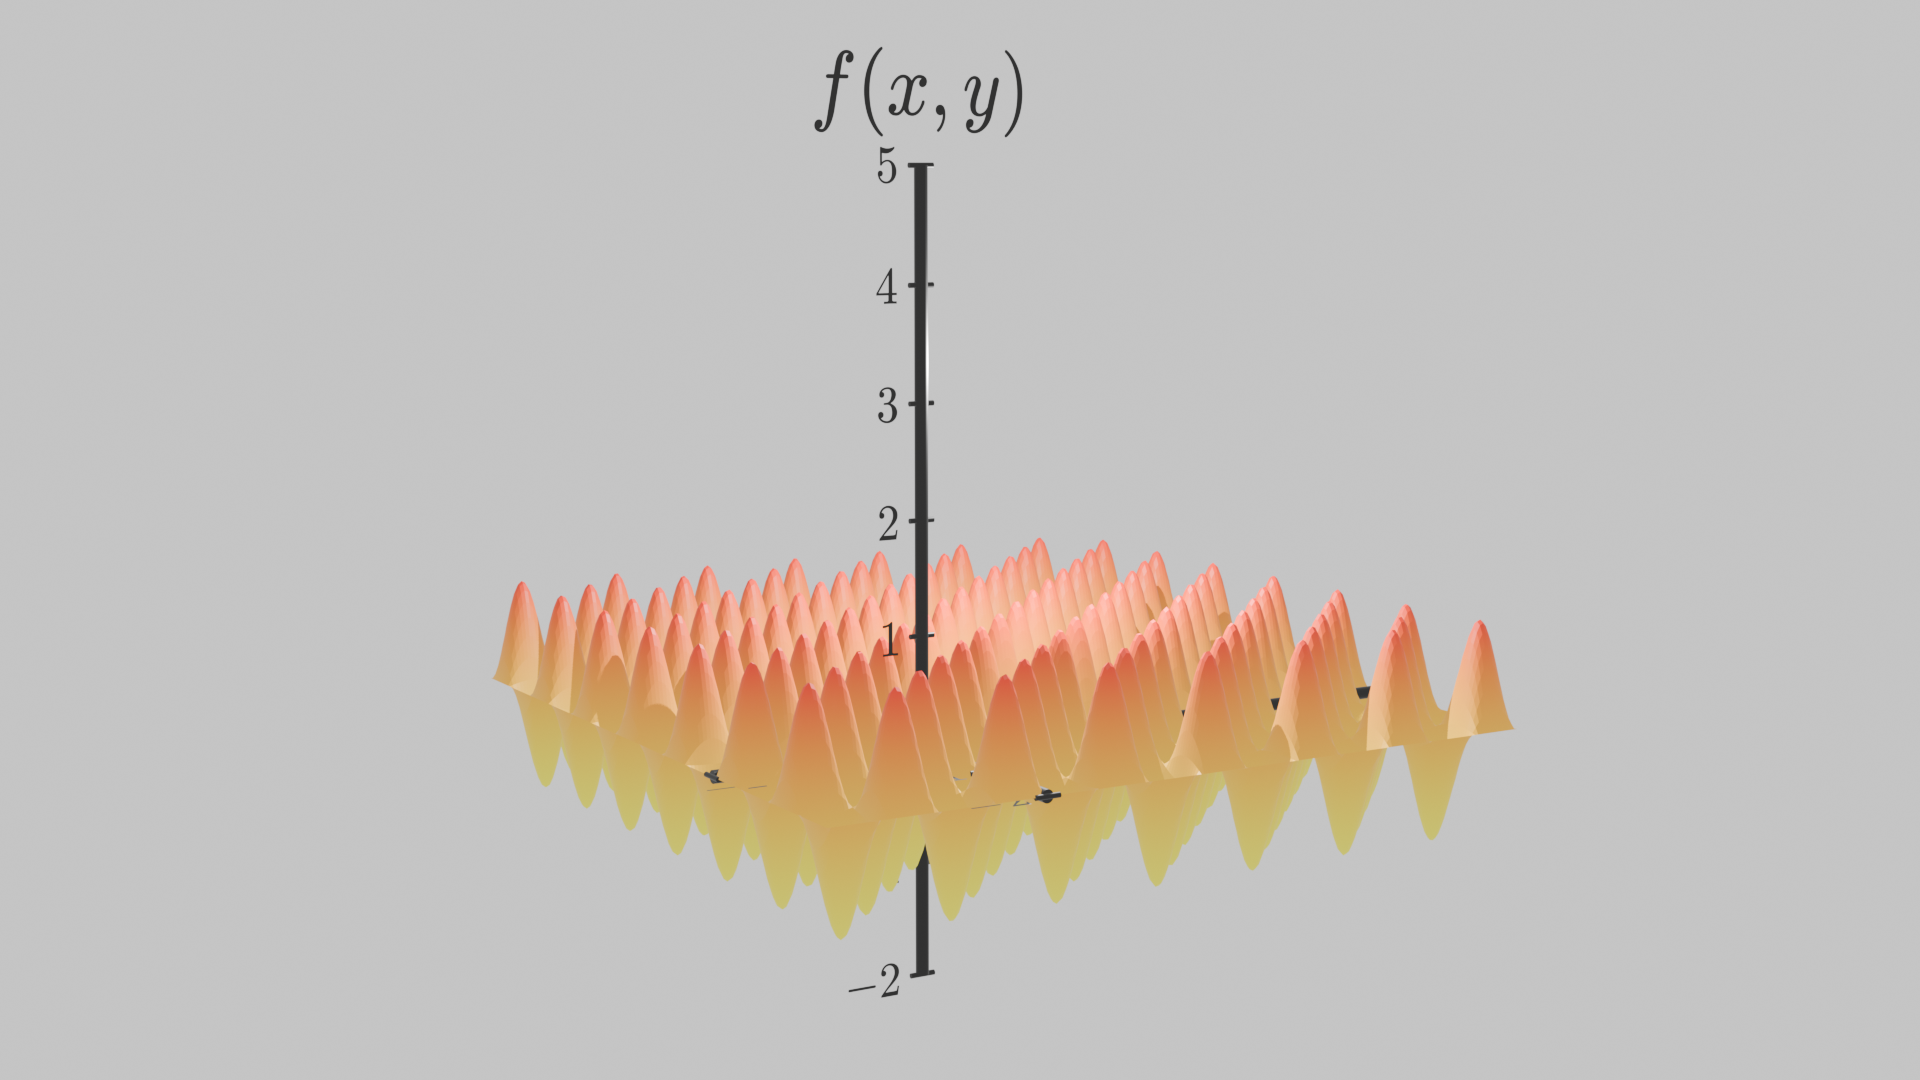

In [9]:
# Basic surface plot example

import blender_plots as bplt

setup_scene()
T = 250
N = 200
axes, ax_to_blender, blender_to_ax = create_axes(x_range=(-2, 5), y_range=(-2, 5), z_range=(-2, 5), x_axis_length=6, y_axis_length=6, z_axis_length=6, z_label="$$f(x,y)$$", x_coord_to_label={i: f"$${i}$$" for i in range(-2, 6) if i != 0}, y_coord_to_label={i: f"$${i}$$" for i in range(-2, 6) if i != 0}, z_coord_to_label={i: f"$${i}$$" for i in range(-2, 6) if i != 0})

t, x, y = np.meshgrid(np.arange(0, T), np.linspace(-2, 5, N), np.linspace(-2, 5, N), indexing='ij')
t, x, y = t.reshape((T, N, N)), x.reshape((T, N, N)), y.reshape((T, N, N))

z = np.sin(2*np.pi * x) * np.sin(2*np.pi * y) * np.sin(3 * 2*np.pi * t / T)
z_min, z_max = -1, 1
z_norm = (z + 1) / 2

r = np.ones_like(z_norm)
g = 1 - z_norm
b = np.zeros_like(z_norm)

color = np.stack([r, g, b], axis=3)

bplt.Surface(*ax_to_blender(x, y, z), color=color, name="red")

# Adjust camera and light
camera = bpy.data.objects["Camera"]
camera.location = (-11, -18, 3)
camera.rotation_euler = (math.radians(82), 0, math.radians(-31))
light = bpy.data.objects["Point"]
light.location = (0, -1, 1.5)
light.rotation_euler = (0, 0, 0)
light.data.energy = 1500

bpy.context.scene.frame_set(60)

render_still(str((pathlib.Path.cwd() / "surface_plot.png").absolute()))

Ahora crearemos un dataset que represente un plano en el espacio 3D y lo renderizaremos en Blender.

In [15]:
import pandas as pd

dataset_path = pathlib.Path.cwd() / "dataset.csv"

x, y = np.meshgrid(np.linspace(-1, 1, 25), np.linspace(-1, 1, 25), indexing='ij')
z = 0.5*x + 0.5*y + np.random.normal(-0.1, 0.1, size=(25,))

def create_dataset():
    """Create a sample dataset and save it to a CSV file."""
    data = {
        'x': x.reshape(-1),
        'y': y.reshape(-1),
        'z': z.reshape(-1)
    }
    df = pd.DataFrame(data)
    df.to_csv(dataset_path, index=False)

create_dataset()

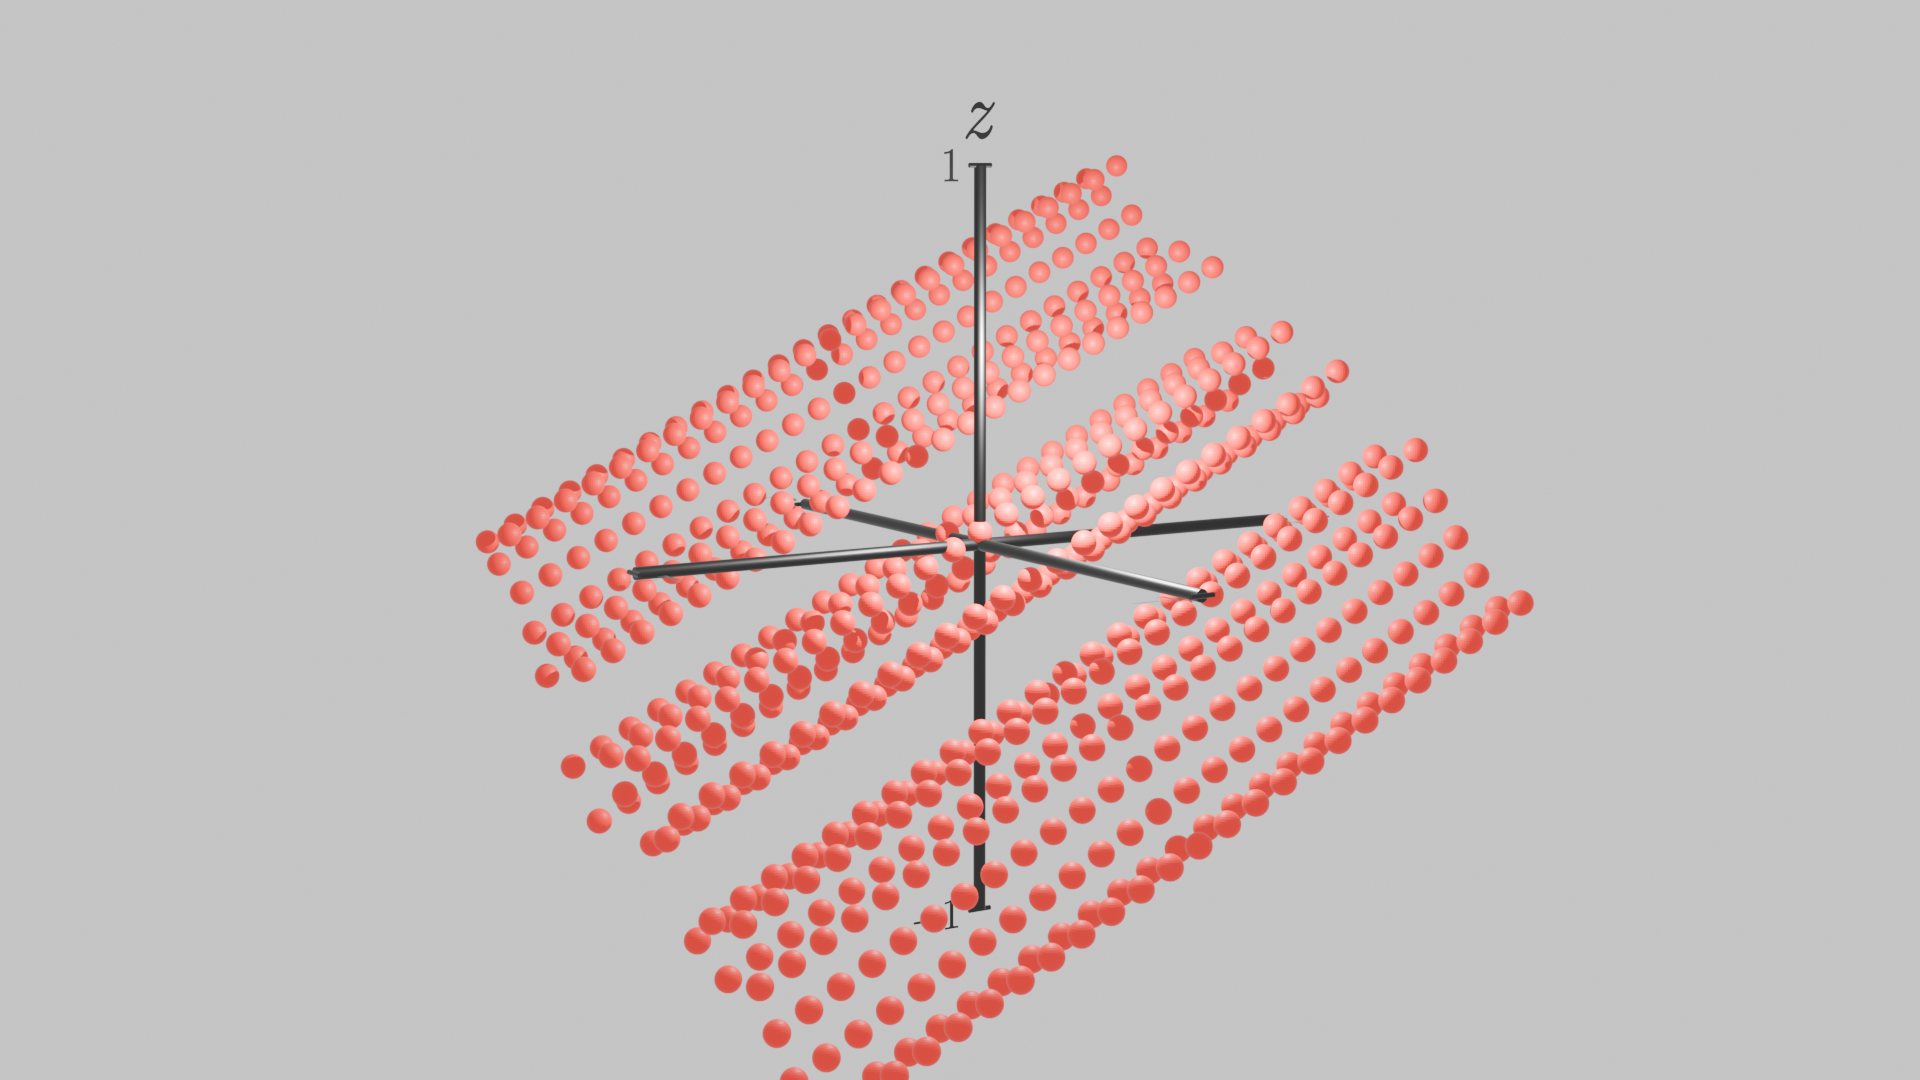

In [18]:
setup_scene()
axes, ax_to_blender, blender_to_ax = create_axes(
    x_range=(-1, 1), y_range=(-1, 1), z_range=(-1, 1),
    x_axis_length=6, y_axis_length=6, z_axis_length=6,
    x_label="$$x$$", y_label="$$y$$", z_label="$$z$$",
    x_coord_to_label={-1: "$$-1$$", 1: "$$1$$"},
    y_coord_to_label={-1: "$$-1$$", 1: "$$1$$"},
    z_coord_to_label={-1: "$$-1$$", 1: "$$1$$"},
)
df = pd.read_csv(dataset_path)
bplt.Scatter(
    *ax_to_blender(df['x'].values, df['y'].values, df['z'].values),
    color=(1, 0, 0, 1),
    marker_type="uv_spheres",
    radius=0.1
)

# Adjust camera and light
camera = bpy.data.objects["Camera"]
camera.location = (-11, -18, 3)
camera.rotation_euler = (math.radians(82), 0, math.radians(-31))
light = bpy.data.objects["Point"]
light.location = (0, -1, 1.5)
light.rotation_euler = (0, 0, 0)
light.data.energy = 1500

render_still(str((pathlib.Path.cwd() / "scatter_plot.png").absolute()))